In [30]:
#pip install pandas plotly jupyter


In [46]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [32]:
# Load the dataset
data_path = 'vehicles_us.csv'  # Replace 'your_dataset.csv' with your actual file name
df = pd.read_csv('/Users/tesskramer/Software-Development-Tools-Project-1/vehicles_us.csv')

# Display the first few rows
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [33]:
# Overview of the dataset
print("Dataset Information:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
df.describe()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB

Summary Statistics:

Missing Values:
price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel           

In [34]:
print(df.columns)


Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')


<h2 style='text-align:center'>Data Cleaning</h2>

In [35]:
#fill all the missing values with a zero, make it into an integer
fillna_and_int = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for i in fillna_and_int:
  df[i] = df[i].fillna(0)
  df[i] = df[i].astype(int)

#fill the missing paint color with unknown
#change the paint color with a missing values with 'unknown'
df["paint_color"] = df["paint_color"].fillna("unknown")
  
  

In [36]:
# 
def cylinder_check(row):
    ''' 
    This function checks if the "cylinders" value is missing (i.e., 0) for a given row. 
    If it is missing, it fills the missing value with the most common cylinder count 
    for that specific car model and year.
    '''
    # Check if the cylinder value is missing (0)
    if row["cylinders"] == 0:
        # Find the unique cylinder values for the given car model and model year
        cylinder = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]]["cylinders"].unique()
        
        # Loop through the unique cylinder values and return the first non-zero value
        for i in range(len(cylinder)):
            if cylinder[i] != 0:
                return cylinder[i]
    
    # If cylinder value is not missing, return the original value
    return row["cylinders"]

# Apply the cylinder_check function to the "cylinders" column of the dataframe
df["cylinders"] = df.apply(cylinder_check, axis=1)



In [37]:
def cylinder_check(row):
    ''' 
    This function checks if the "cylinders" value is missing (i.e., 0) for a given row. 
    If it is missing, it fills the missing value with the most common cylinder count 
    for that specific car model and year.
    '''
    # Check if the cylinder value is missing (0)
    if row["cylinders"] == 0:
        # Find the unique cylinder values for the given car model and model year
        cylinder = df.loc[df["model"] == row["model"]].loc[df["model_year"] == row["model_year"]]["cylinders"].unique()
        
        # Loop through the unique cylinder values and return the first non-zero value
        for i in range(len(cylinder)):
            if cylinder[i] != 0:
                return cylinder[i]
    
    # If cylinder value is not missing, return the original value
    return row["cylinders"]

# Apply the cylinder_check function to the "cylinders" column of the dataframe
df["cylinders"] = df.apply(cylinder_check, axis=1)


In [38]:
def model_year_check(row):
    ''' 
    This function checks if the "model_year" value is missing (i.e., 0) for a given row. 
    If it is missing, it fills the missing value with the most common model year 
    for that specific car model and type.
    '''
    # Check if the model year value is missing (0)
    if row["model_year"] == 0:
        # Find the unique model year values for the given car model and type
        model_year = df.loc[df["model"] == row["model"]].loc[df["type"] == row["type"]]["model_year"].unique()
        
        # Loop through the unique model year values and return the first non-zero value
        for i in range(len(model_year)):
            if model_year[i] != 0:
                return model_year[i]
    
    # If the model year value is not missing, return the original value
    return row["model_year"]

# Apply the model_year_check function to the "model_year" column of the dataframe
df["model_year"] = df.apply(model_year_check, axis=1)


In [39]:
def paint_color_check(row):
    ''' 
    This function checks if the "paint_color" value is missing (i.e., "unknown") for a given row. 
    If it is missing, it fills the missing value with the most common paint color 
    for that specific car model.
    '''
    # Check if the paint color value is missing (i.e., "unknown")
    if row["paint_color"] == "unknown":
        # Find the unique paint color values for the given car model
        paint_color = df.loc[df["model"] == row["model"]]["paint_color"].unique()
        
        # Loop through the unique paint color values and return the first non-"unknown" value
        for i in range(len(paint_color)):
            if paint_color[i] != "unknown":
                return paint_color[i]
    
    # If the paint color value is not missing, return the original value
    return row["paint_color"]

# Apply the paint_color_check function to the "paint_color" column of the dataframe
df["paint_color"] = df.apply(paint_color_check, axis=1)


In [40]:
# Split the "model" column into two parts: the manufacturer and the model name.
# The first part (before the first space) will be stored in the "manufacturer" column.
df["manufacturer"] = df["model"].str.split(" ", n=1, expand=True)[0]

# The second part (after the first space) will be stored in the "model_name" column.
df["model_name"] = df["model"].str.split(" ", n=1, expand=True)[1]

# Drop the original "model" column from the dataframe as it's no longer needed.
df.drop(columns=["model"], inplace=True)


In [41]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the first (Q1) and third (Q3) quartiles for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers (only in numeric columns)
outliers = numeric_df[(numeric_df < lower_bound) | (numeric_df > upper_bound)].dropna()

# Remove rows with outliers from the original DataFrame (only in numeric columns)
df = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]


In [42]:
# Use .loc to modify the 'date_posted' column in the original DataFrame
df.loc[:, "date_posted"] = pd.to_datetime(df["date_posted"], format='%Y-%m-%d')


In [43]:
# Plot vehicle type for each manufacturer
fig = px.histogram(df, x="manufacturer", color="type", title="Number of cars for each manufacturer")
fig.show()

In [44]:
# Count the number of posts per day
daily_counts = df['date_posted'].dt.date.value_counts().sort_index()

# Plotting the time series (daily counts)
daily_counts.plot(kind='line', figsize=(10, 6), title="Number of Posts Over Time", xlabel="Date", ylabel="Number of Posts")


AttributeError: Can only use .dt accessor with datetimelike values

Text(0, 0.5, 'Price (USD)')

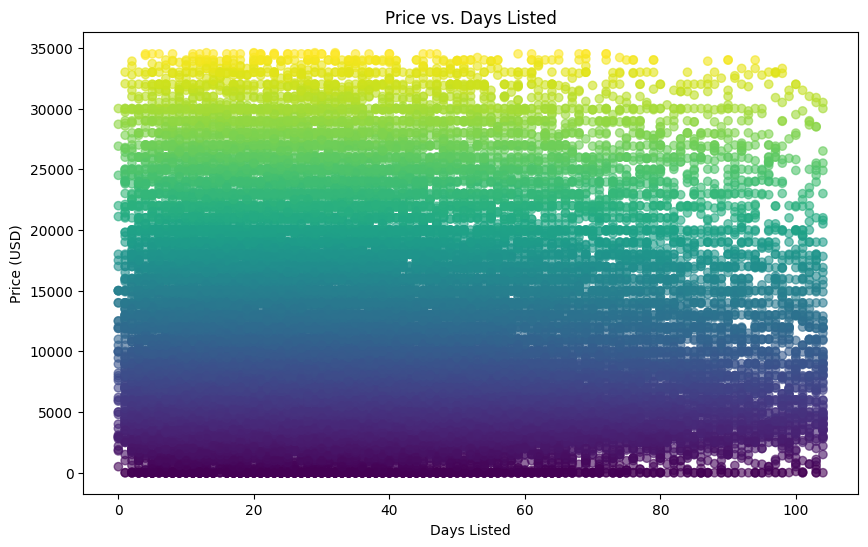

In [49]:
# Scatter plot for price vs. days listed with color based on price
plt.figure(figsize=(10, 6))
plt.scatter(df['days_listed'], df['price'], c=df['price'], cmap='viridis', alpha=0.6)
plt.title('Price vs. Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Price (USD)')

In [48]:
#  histogram of the condition vs year
fig = px.histogram(df, x="model_year", color="condition", hover_data=df.columns)
fig.show()